In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Generowanie zaszumionego sygnału sinusoidalnego
fs = 1000  # Częstotliwość próbkowania
t = np.linspace(0, 1, fs)
signal = np.sin(2 * np.pi * 5 * t)  # Czysty sygnał sinusoidalny
noise = 0.5 * np.random.randn(len(t))  # Szum Gaussowski
noisy_signal = signal + noise



In [4]:
# Implementacja filtra FIR
def fir_filter(x, b):
    y = np.zeros(len(x))
    M = len(b)
    for n in range(M, len(x)):
        y[n] = np.dot(b, x[n - M:n][::-1])
    return y

# Współczynniki FIR dla Wariantu 4
b_fir = [0.2, 0.3, 0.2]
filtered_fir = fir_filter(noisy_signal, b_fir)

# Implementacja filtra IIR
def iir_filter(x, b, a):
    y = np.zeros(len(x))
    M, N = len(b), len(a)
    for n in range(len(x)):
        if n >= M:
            y[n] += np.dot(b, x[n - M:n][::-1])
        else:
            y[n] += np.dot(b[:n + 1], x[:n + 1][::-1])
        if n >= N:
            y[n] -= np.dot(a[1:], y[n - N + 1:n][::-1])
    return y

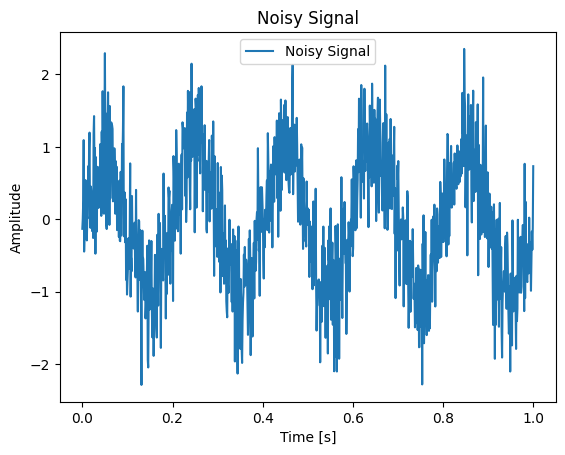

In [18]:
# Współczynniki IIR dla Wariantu 4
b_iir = [1, 0.5, 0.3]
a_iir = [1, -0.6]
filtered_iir = iir_filter(noisy_signal, b_iir, a_iir)

# Implementacja adaptacyjnego filtra LMS
def lms_filter(x, d, mu, M):
    n = len(x)
    w = np.zeros(M)  # Wagi filtra
    y = np.zeros(n)
    e = np.zeros(n)
    for i in range(M, n):
        x_segment = x[i - M:i][::-1]
        y[i] = np.dot(w, x_segment)
        e[i] = d[i] - y[i]
        w += mu * e[i] * x_segment
    return y, e, w

# Parametry LMS dla Wariantu 4
desired_signal = signal  # Czysty sygnał sinusoidalny jako pożądane wyjście
mu = 0.1
M_lms = 4
filtered_lms, error_lms, weights = lms_filter(noisy_signal, desired_signal, mu, M_lms)



plt.plot(t, noisy_signal, label="Noisy Signal")
plt.title("Noisy Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()



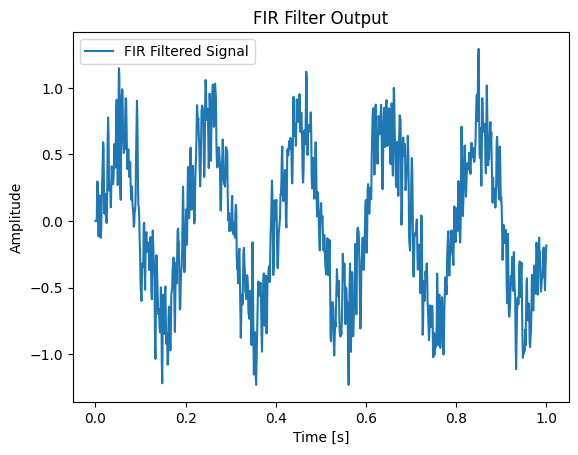

In [19]:



plt.plot(t, filtered_fir, label="FIR Filtered Signal")
plt.title("FIR Filter Output")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()





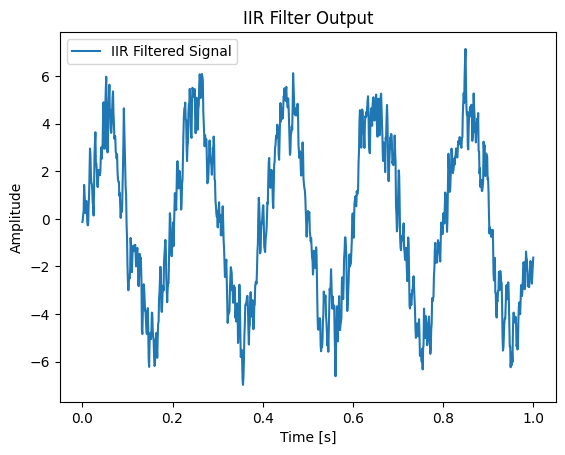

In [20]:

plt.plot(t, filtered_iir, label="IIR Filtered Signal")
plt.title("IIR Filter Output")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()




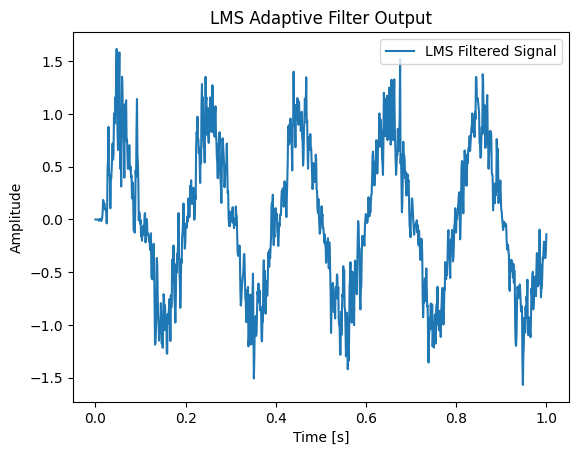

In [21]:

plt.plot(t, filtered_lms, label="LMS Filtered Signal")
plt.title("LMS Adaptive Filter Output")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()
